In [3]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import regularizers
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
trainpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/train/*', recursive=True):
  if not name.endswith('.zip'):
    trainpaths.append(name)
valpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/valid/*', recursive=True):
  if not name.endswith('.zip'):
    valpaths.append(name)
testpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/test/*', recursive=True):
  if not name.endswith('.zip'):
    testpaths.append(name)
print(trainpaths)
print(valpaths)
print(testpaths)

['/content/FruitRecognition/Fruits Classification/train/Mango', '/content/FruitRecognition/Fruits Classification/train/Strawberry', '/content/FruitRecognition/Fruits Classification/train/Grape', '/content/FruitRecognition/Fruits Classification/train/Apple', '/content/FruitRecognition/Fruits Classification/train/Banana']
['/content/FruitRecognition/Fruits Classification/valid/Mango', '/content/FruitRecognition/Fruits Classification/valid/Strawberry', '/content/FruitRecognition/Fruits Classification/valid/Grape', '/content/FruitRecognition/Fruits Classification/valid/Apple', '/content/FruitRecognition/Fruits Classification/valid/Banana']
['/content/FruitRecognition/Fruits Classification/test/Mango', '/content/FruitRecognition/Fruits Classification/test/Strawberry', '/content/FruitRecognition/Fruits Classification/test/Grape', '/content/FruitRecognition/Fruits Classification/test/Apple', '/content/FruitRecognition/Fruits Classification/test/Banana']


In [5]:
train_img_paths=[]
train_labels=[]
for i in trainpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    train_img_paths.append(name)
    train_labels.append(a[-2])

val_img_paths=[]
val_labels=[]
for i in valpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    val_img_paths.append(name)
    val_labels.append(a[-2])

test_img_paths=[]
test_labels=[]
for i in testpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    test_img_paths.append(name)
    test_labels.append(a[-2])

print(len(train_img_paths))
print(len(val_img_paths))
print(len(test_img_paths))
print(set(train_labels))

9700
200
100
{'Mango', 'Apple', 'Banana', 'Strawberry', 'Grape'}


#*Count Plot of Train data in data set:*

<Axes: xlabel='1', ylabel='count'>

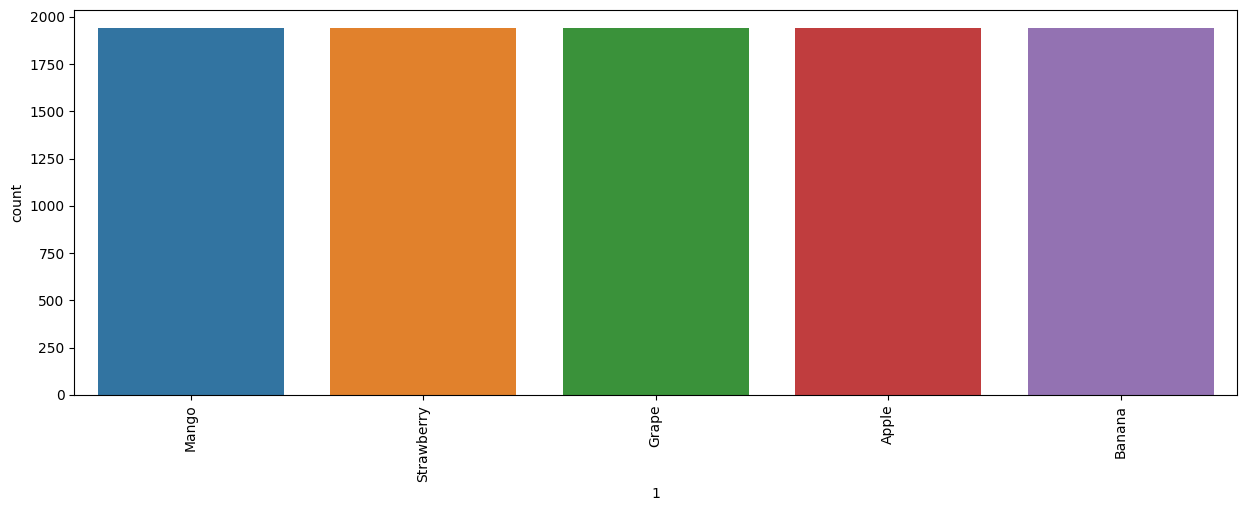

In [6]:
trainImgPath = pd.Series(train_img_paths).astype(str)
trainLabels=pd.Series(train_labels)
trainData = pd.concat([trainImgPath,trainLabels],axis=1)
display(Markdown("#*Count Plot of Train data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=trainData[1], order=trainData[1].value_counts().index)

#*Count Plot of Validation data in data set:*

<Axes: xlabel='1', ylabel='count'>

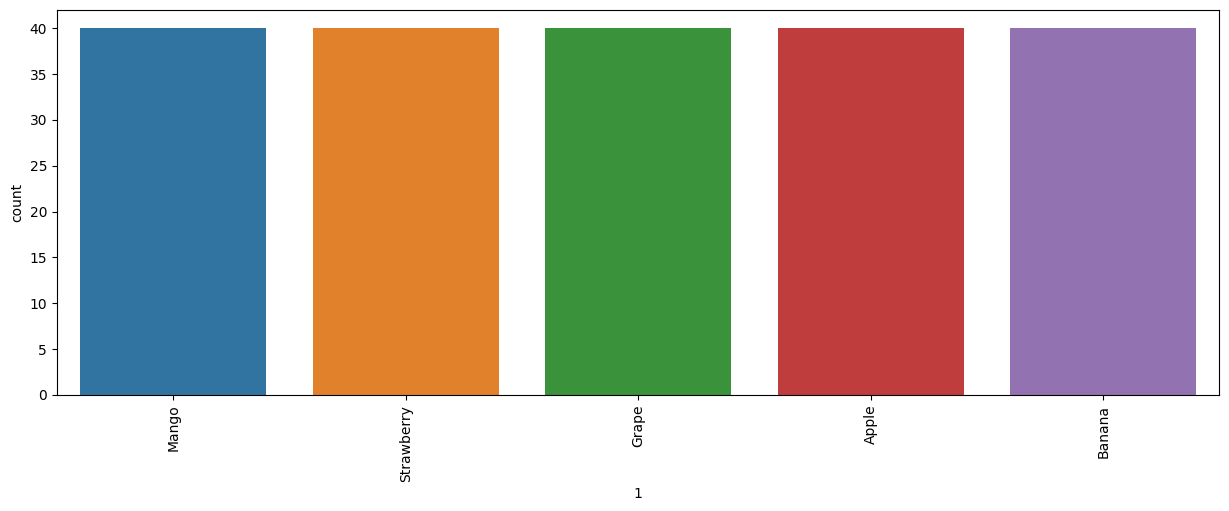

In [7]:
valImgPath = pd.Series(val_img_paths).astype(str)
valLabels=pd.Series(val_labels)
valData = pd.concat([valImgPath,valLabels],axis=1)
display(Markdown("#*Count Plot of Validation data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=valData[1], order=valData[1].value_counts().index)

#*Count Plot of Test data in data set:*

<Axes: xlabel='1', ylabel='count'>

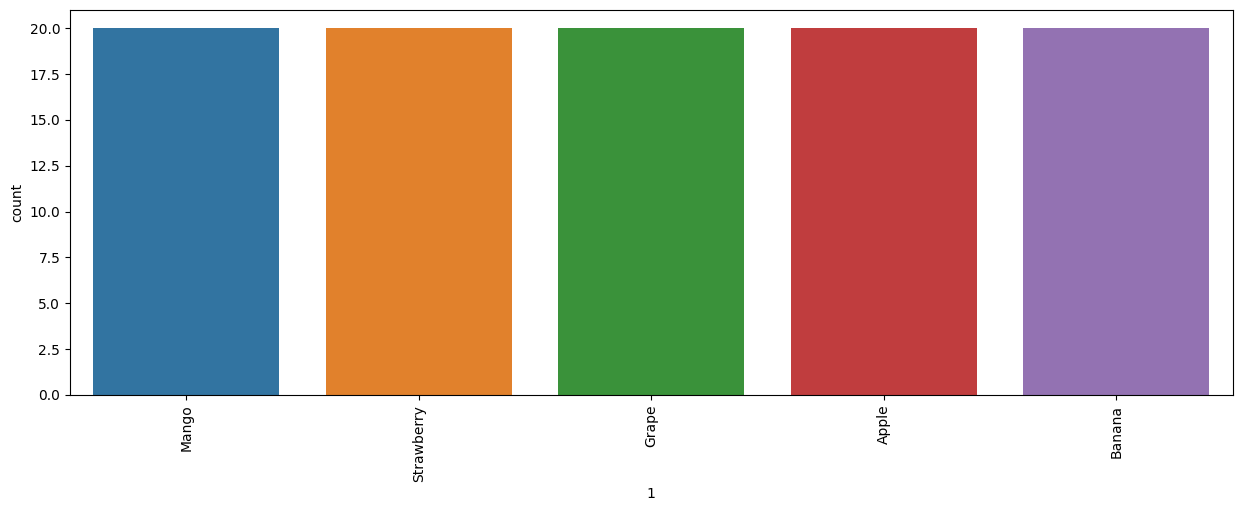

In [8]:
testImgPath = pd.Series(test_img_paths).astype(str)
testLabels=pd.Series(test_labels)
testData = pd.concat([testImgPath,testLabels],axis=1)
display(Markdown("#*Count Plot of Test data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=testData[1], order=testData[1].value_counts().index)

In [9]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [21]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_dataframe(
    dataframe = trainData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

val_data = val_gen.flow_from_dataframe(
    dataframe = valData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

test_data = test_gen.flow_from_dataframe(
    dataframe = testData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)


Found 9700 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


In [22]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu",activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000, activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [23]:
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [24]:
history1 = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 160s 517ms/step - loss: 1.5910 - accuracy: 0.2874 - val_loss: 1.6110 - val_accuracy: 0.1900
Epoch 2/10
304/304 [==============================] - 151s 498ms/step - loss: 1.5860 - accuracy: 0.2681 - val_loss: 1.5828 - val_accuracy: 0.2550
Epoch 3/10
304/304 [==============================] - 155s 511ms/step - loss: 1.3888 - accuracy: 0.4158 - val_loss: 1.2963 - val_accuracy: 0.4900
Epoch 4/10
304/304 [==============================] - 156s 513ms/step - loss: 1.2933 - accuracy: 0.4573 - val_loss: 1.2582 - val_accuracy: 0.4800
Epoch 5/10
304/304 [==============================] - 156s 515ms/step - loss: 1.2133 - accuracy: 0.4910 - val_loss: 1.1850 - val_accuracy: 0.5100
Epoch 6/10
304/304 [==============================] - 156s 513ms/step - loss: 1.2271 - accuracy: 0.4853 - val_loss: 1.1654 - val_accuracy: 0.5250
Epoch 7/10
304/304 [==============================] - 156s 515ms/step - loss: 1.1675 - accuracy: 0.5109 - val_loss: 1.2002 -

In [25]:
history2 = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 151s 495ms/step - loss: 1.0662 - accuracy: 0.5684 - val_loss: 1.0730 - val_accuracy: 0.5450
Epoch 2/10
304/304 [==============================] - 151s 498ms/step - loss: 1.0381 - accuracy: 0.5831 - val_loss: 0.9757 - val_accuracy: 0.6050
Epoch 3/10
304/304 [==============================] - 157s 517ms/step - loss: 1.0159 - accuracy: 0.5880 - val_loss: 1.0308 - val_accuracy: 0.5600
Epoch 4/10
304/304 [==============================] - 157s 517ms/step - loss: 0.9907 - accuracy: 0.6037 - val_loss: 1.2542 - val_accuracy: 0.5300
Epoch 5/10
304/304 [==============================] - 153s 503ms/step - loss: 0.9739 - accuracy: 0.6194 - val_loss: 0.9776 - val_accuracy: 0.6150
Epoch 6/10
304/304 [==============================] - 158s 519ms/step - loss: 0.9360 - accuracy: 0.6387 - val_loss: 0.8712 - val_accuracy: 0.6600
Epoch 7/10
304/304 [==============================] - 157s 516ms/step - loss: 0.9132 - accuracy: 0.6484 - val_loss: 0.8721 -

In [26]:
history3 = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 151s 497ms/step - loss: 0.8128 - accuracy: 0.6939 - val_loss: 0.7961 - val_accuracy: 0.6700
Epoch 2/10
304/304 [==============================] - 152s 500ms/step - loss: 0.8127 - accuracy: 0.6941 - val_loss: 0.8432 - val_accuracy: 0.6750
Epoch 3/10
304/304 [==============================] - 157s 518ms/step - loss: 0.7785 - accuracy: 0.7189 - val_loss: 0.8142 - val_accuracy: 0.6800
Epoch 4/10
304/304 [==============================] - 158s 519ms/step - loss: 0.7378 - accuracy: 0.7307 - val_loss: 0.7702 - val_accuracy: 0.6700
Epoch 5/10
304/304 [==============================] - 157s 518ms/step - loss: 0.6899 - accuracy: 0.7521 - val_loss: 0.8077 - val_accuracy: 0.7100
Epoch 6/10
304/304 [==============================] - 153s 504ms/step - loss: 0.6550 - accuracy: 0.7668 - val_loss: 0.7600 - val_accuracy: 0.6800
Epoch 7/10
304/304 [==============================] - 157s 517ms/step - loss: 0.6356 - accuracy: 0.7770 - val_loss: 0.8344 -

In [27]:
history4 = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 149s 489ms/step - loss: 0.4445 - accuracy: 0.8612 - val_loss: 0.8698 - val_accuracy: 0.6750
Epoch 2/10
304/304 [==============================] - 156s 513ms/step - loss: 0.4043 - accuracy: 0.8779 - val_loss: 0.8261 - val_accuracy: 0.7000
Epoch 3/10
304/304 [==============================] - 158s 520ms/step - loss: 0.4320 - accuracy: 0.8643 - val_loss: 0.8550 - val_accuracy: 0.6800
Epoch 4/10
304/304 [==============================] - 158s 519ms/step - loss: 0.3867 - accuracy: 0.8826 - val_loss: 0.8404 - val_accuracy: 0.6950
Epoch 5/10
304/304 [==============================] - 155s 510ms/step - loss: 0.3069 - accuracy: 0.9141 - val_loss: 0.8987 - val_accuracy: 0.6950
Epoch 6/10
304/304 [==============================] - 153s 503ms/step - loss: 0.2017 - accuracy: 0.9546 - val_loss: 1.0306 - val_accuracy: 0.6650
Epoch 7/10
304/304 [==============================] - 158s 519ms/step - loss: 0.2824 - accuracy: 0.9233 - val_loss: 0.9006 -

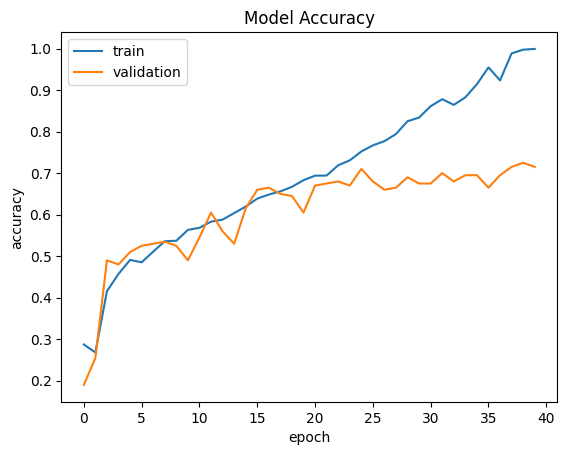

In [28]:
plt.plot(history1.history['accuracy']+history2.history['accuracy']+history3.history['accuracy']+history4.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy']+history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

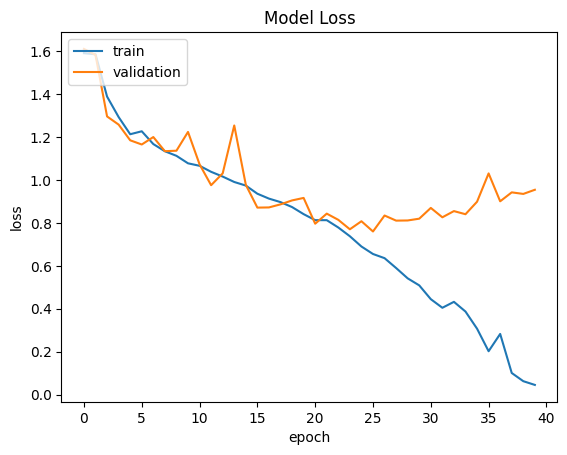

In [29]:
plt.plot(history1.history['loss']+history2.history['loss']+history3.history['loss']+history4.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']+history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
print(classification_report(test_data.labels,pred))

4/4 [==============================] - 1s 153ms/step
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.73      0.80      0.76        20
           2       0.94      0.80      0.86        20
           3       0.76      0.80      0.78        20
           4       0.89      0.80      0.84        20

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



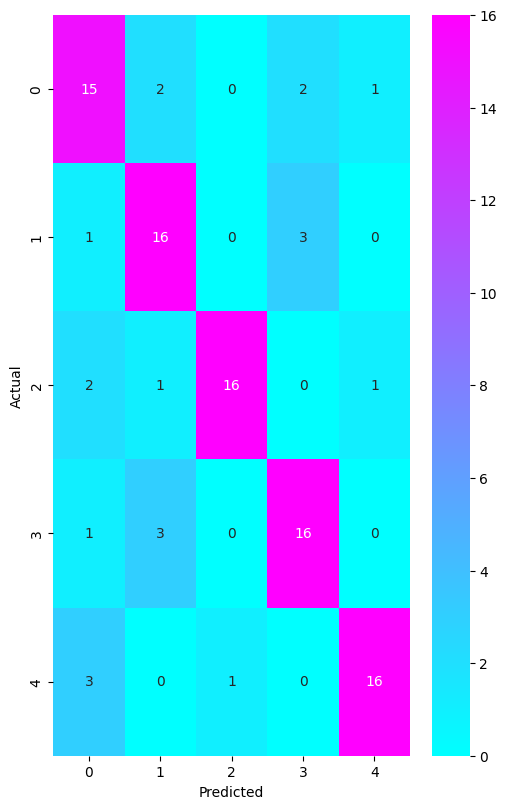

In [31]:
classes=[i for i in range(5)]
con_mat_df = pd.DataFrame(confusion_matrix(test_data.labels,pred),
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(5, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
model_json = model.to_json()
with open("/content/modelv2_2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/modelv2_2.h5")
print("Saved model to disk")

Saved model to disk


In [36]:
train_data.class_indices

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}

In [37]:
from skimage import io
#plt.imshow()
img = cv2.resize(io.imread("https://www.thespruceeats.com/thmb/h-Ms-7u8wCxNRV90He2-NMSR_7U=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/vegan-chocolate-peanut-butter-banana-smoothie-1000994-step-01-cropped-cb4d40c4a42847bba50c266845ea239e.jpg"),(224,224))
img = np.expand_dims(img, axis=0)
model.predict(img)

1/1 [==============================] - 1s 1s/step


array([[3.4087461e-05, 9.9900973e-01, 2.6823705e-04, 6.8771350e-04,
        2.6298906e-07]], dtype=float32)